In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [3]:
def preprocessing(data_df):
  #Removing [kW] from column names
  data_df.columns = [col.replace(' [kW]', '') for col in data_df.columns]

  #Summing the columns 'Furnace 1' and 'Furnace 2' since we only need the total energy usage by both the furnaces
  data_df['Furnace'] = data_df[['Furnace 1','Furnace 2']].sum(axis=1)

  #Finding the average usage of all kitchens('Kitchen 12','Kitchen 14','Kitchen 38')
  data_df['Kitchen'] = data_df[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)

  #Dropping old columns on which the aggregation have been done
  data_df = data_df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)

  #Converting the unix timestamp values in the column 'time' to a readable date format
  #Setting freq= 'min' since readings are being taken in a time span of one min
  time_index = pd.date_range('2016-01-01 05:00', periods=len(data_df),  freq='min')  
  time_index = pd.DatetimeIndex(time_index)
  data_df = data_df.set_index(time_index)
  data_df = data_df.drop(['time'], axis=1)
  data_df = data_df.drop(['icon', 'summary'], axis=1)

  #We replace these missing values with the next valid observation we have
  data_df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
  data_df['cloudCover'] = data_df['cloudCover'].astype('float')

  # So we can drop the colums which have similar data
  data_df = data_df.drop(columns=['Solar','use'])

  return data_df


## Reading Data

In [12]:
#data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HomeCs.csv')
data_df = pd.read_csv('C:/Users/k64093431/Downloads/IOT_case/HomeCs.csv')
data_df=preprocessing(data_df)

C:\Users\k64093431\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,




## Train Test **Split**

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
X=data_df.drop('House overall',axis=1)
Y=data_df['House overall']

# Spliting the data into 6H interval for data modeling
resampled_y = Y.resample('6 H').sum()
resampled_y.shape
n = len(resampled_y)
train_df = resampled_y[0:int(n*0.7)]
test_df = resampled_y[int(n*0.7):]


#  Machine Learning and Deep Learning Models

## Simple Moving Average

Root Mean Squared Error for SMA with window size 3 is :  786.9776298296424


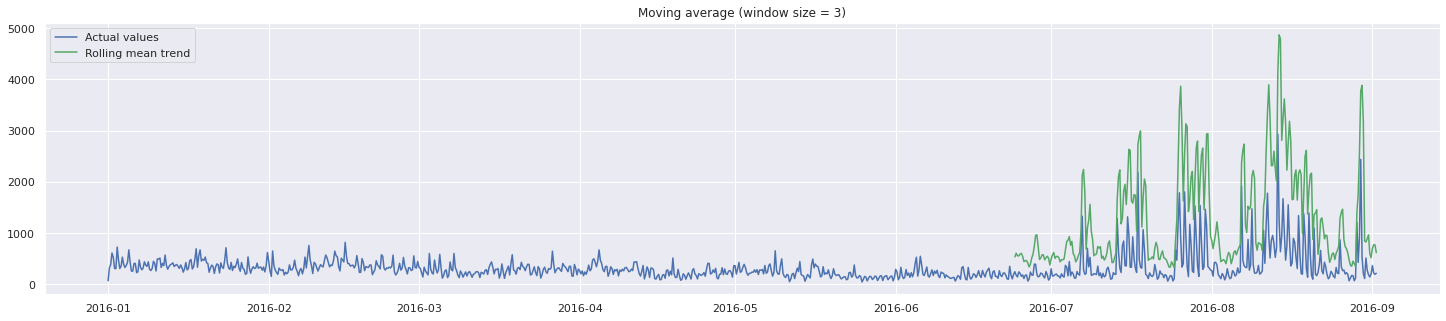

In [ ]:
#Simple Moving Average

weights = np.ones(3) #this creates an array with integers 1 to 10 included

ma3 = train_df.rolling(3).apply(lambda train_df: np.dot(train_df, weights).sum(), raw=True)


ma3=ma3.fillna(ma3.mean())
rmse = mean_squared_error(train_df, ma3, squared=False)
print('Root Mean Squared Error for SMA with window size 3 is : ' , rmse)

plt.figure(figsize=(25,5))
plt.title("Moving average (window size = {})".format(3))
plt.plot(train_df[:], label="Actual values")
plt.plot(ma3[700:], "g", label="Rolling mean trend")
plt.legend(loc="upper left")
plt.grid(True)

Root Mean Squared Error for SMA with window size 6 is :  1855.9019641126933


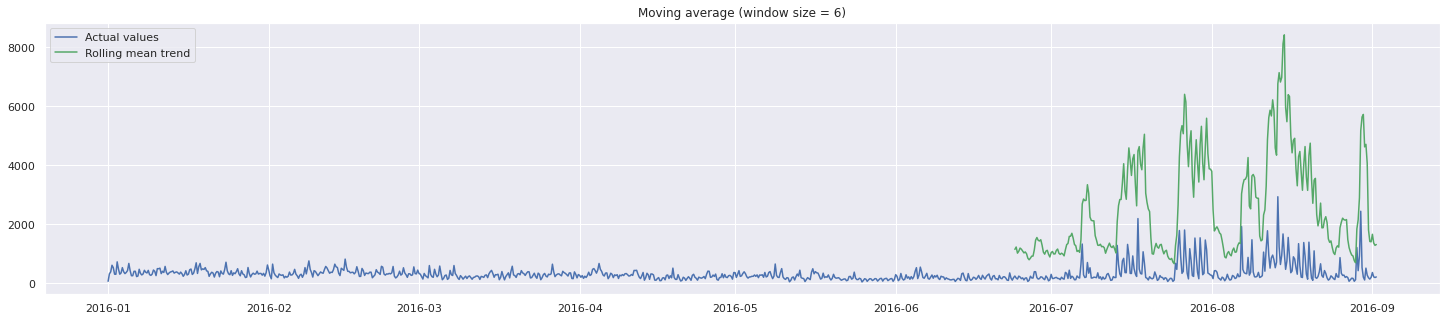

In [ ]:
# Simple Moving average with Window size 6

weights = np.ones(6) #this creates an array with integers 1 to 10 included
ma6 = train_df.rolling(6).apply(lambda train_df: np.dot(train_df, weights).sum(), raw=True)

ma6=ma6.fillna(ma6.mean())
rmse = mean_squared_error(train_df, ma6, squared=False)
print('Root Mean Squared Error for SMA with window size 6 is : ' , rmse)

plt.figure(figsize=(25,5))
plt.title("Moving average (window size = {})".format(6))
plt.plot(train_df[:], label="Actual values")
plt.plot(ma6[700:], "g", label="Rolling mean trend")
plt.legend(loc="upper left")
plt.grid(True)

## Weighted Moving Average

Root Mean Squared Error for WMA with window size 3 is :  137.68803457819516


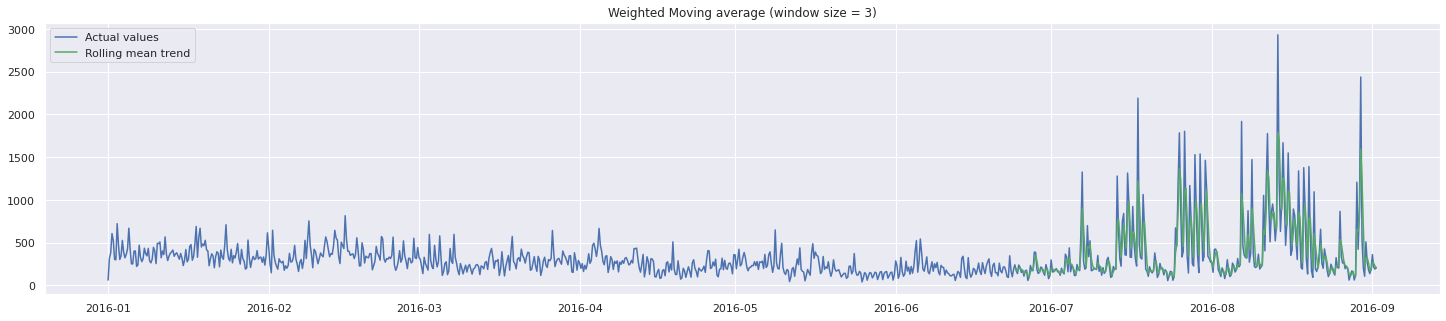

In [ ]:
#weighted moving average with window size 3

weights = np.arange(1,4) #this creates an array with integers 1 to 10 included
wma3 = train_df.rolling(3).apply(lambda train_df: np.dot(train_df, weights)/weights.sum(), raw=True)

wma3=wma3.fillna(wma3.mean())
rmse = mean_squared_error(train_df, wma3, squared=False)
print('Root Mean Squared Error for WMA with window size 3 is : ' , rmse)

plt.figure(figsize=(25,5))
plt.title("Weighted Moving average (window size = {})".format(3))
plt.plot(train_df[:], label="Actual values")
plt.plot(wma3[700:], "g", label="Rolling mean trend")
plt.legend(loc="upper left")
plt.grid(True)

Root Mean Squared Error for WMA with window size 6 is :  171.70317434323965


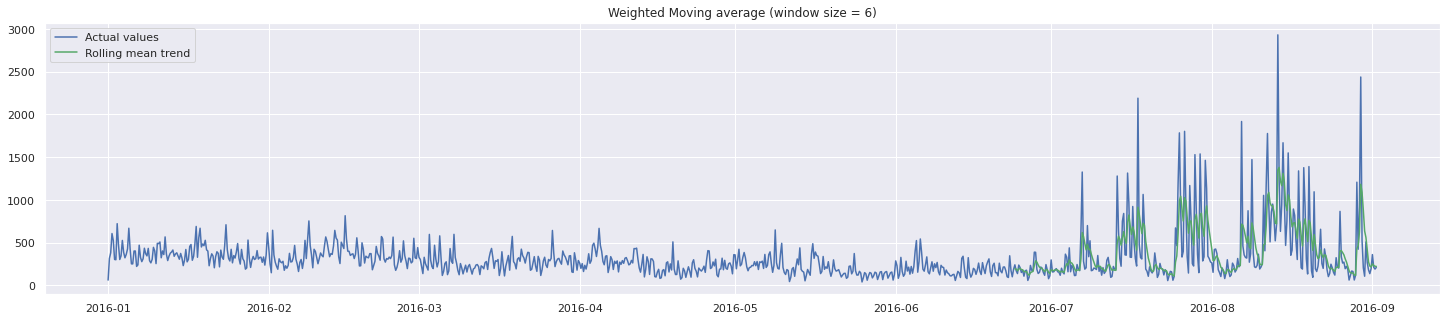

In [ ]:
#weighted moving average with window size 6
weights = np.arange(1,7) #this creates an array with integers 1 to 10 included
wma6 = train_df.rolling(6).apply(lambda train_df: np.dot(train_df, weights)/weights.sum(), raw=True)

wma6=wma6.fillna(wma6.mean())
rmse = mean_squared_error(train_df, wma6, squared=False)
print('Root Mean Squared Error for WMA with window size 6 is : ' , rmse)

plt.figure(figsize=(25,5))
plt.title("Weighted Moving average (window size = {})".format(6))
plt.plot(train_df[:], label="Actual values")
plt.plot(wma6[700:], "g", label="Rolling mean trend")
plt.legend(loc="upper left")
plt.grid(True)

Root Mean Squared Error for WMA with window size 12 is :  200.11463915911827


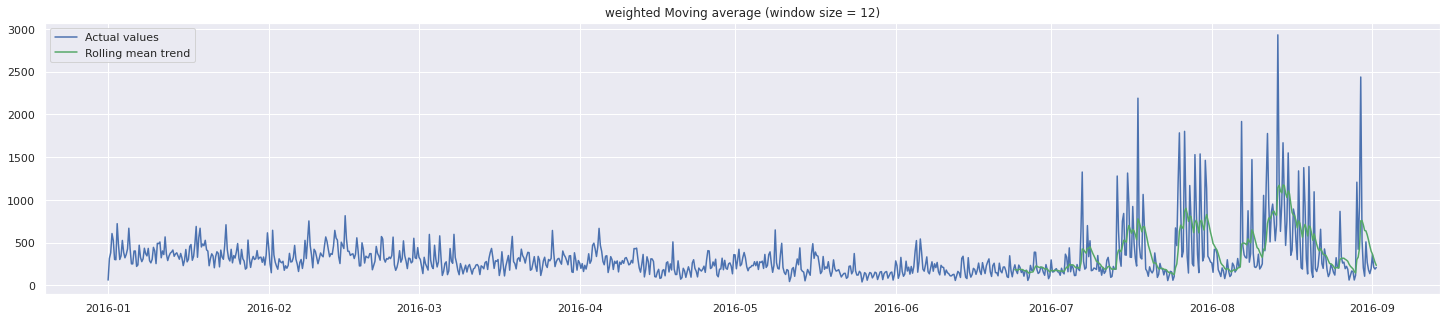

In [ ]:
#weighted moving average with window size 12
weights = np.arange(1,13) #this creates an array with integers 1 to 10 included
wma12 = train_df.rolling(12).apply(lambda train_df: np.dot(train_df, weights)/weights.sum(), raw=True)

wma12=wma12.fillna(wma12.mean())
rmse = mean_squared_error(train_df, wma12, squared=False)
print('Root Mean Squared Error for WMA with window size 12 is : ' , rmse)

plt.figure(figsize=(25,5))
plt.title("weighted Moving average (window size = {})".format(12))
plt.plot(train_df[:], label="Actual values")
plt.plot(wma12[700:], "g", label="Rolling mean trend")
plt.legend(loc="upper left")
plt.grid(True)

## Exponential Moving Average

Root Mean Squared Error for EMA with window size 3 is :  124.49047217128009


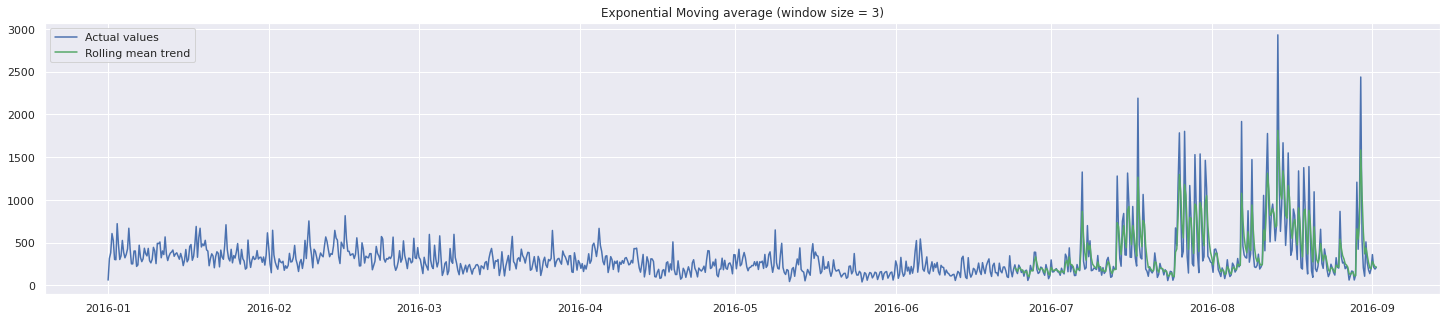

In [ ]:
#exponential moving average with window size 3

ema3 = train_df.ewm(span=3).mean()

ema3=ema3.fillna(ema3.mean())
rmse = mean_squared_error(train_df, ema3, squared=False)
print('Root Mean Squared Error for EMA with window size 3 is : ' , rmse)

plt.figure(figsize=(25,5))
plt.title("Exponential Moving average (window size = {})".format(3))
plt.plot(train_df[:], label="Actual values")
plt.plot(ema3[700:], "g", label="Rolling mean trend")
plt.legend(loc="upper left")
plt.grid(True)

Root Mean Squared Error for EMA with window size 6 is :  169.31283364840576


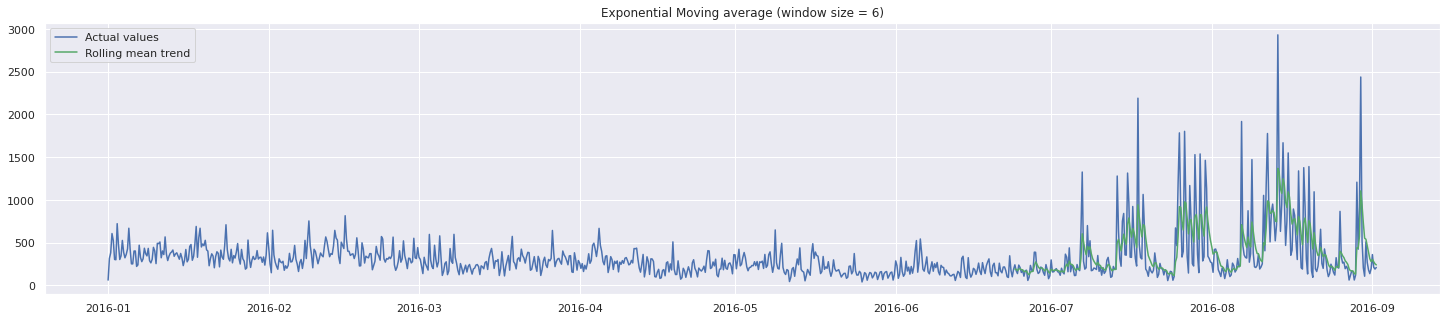

In [ ]:
#exponential moving average with window size 6

ema6 = train_df.ewm(span=6).mean()

ema6=ema6.fillna(ema6.mean())
rmse = mean_squared_error(train_df, ema6, squared=False)
print('Root Mean Squared Error for EMA with window size 6 is : ' , rmse)

plt.figure(figsize=(25,5))
plt.title("Exponential Moving average (window size = {})".format(6))
plt.plot(train_df[:], label="Actual values")
plt.plot(ema6[700:], "g", label="Rolling mean trend")
plt.legend(loc="upper left")
plt.grid(True)

Root Mean Squared Error for EMA with window size 12 is :  198.51598316902832


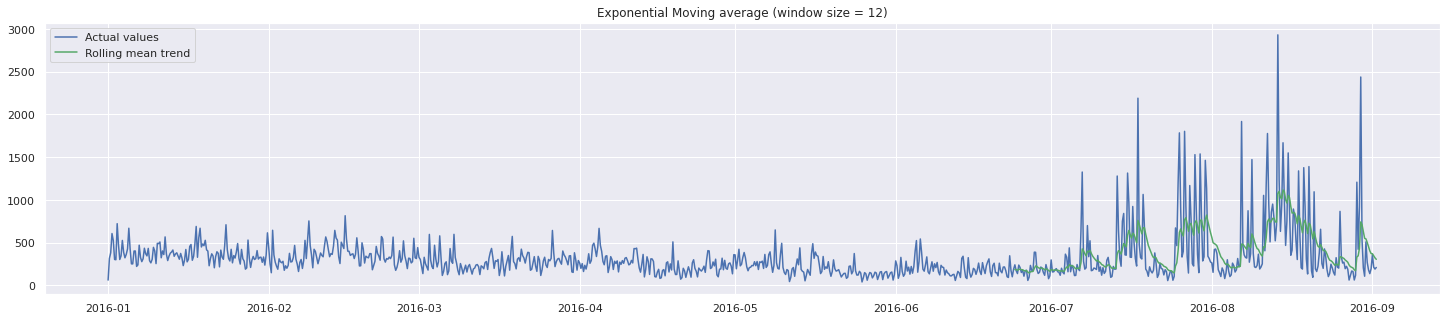

In [ ]:
#exponential moving average with window size 12

ema12 = train_df.ewm(span=12).mean()

ema12=ema12.fillna(ema12.mean())
rmse = mean_squared_error(train_df, ema12, squared=False)
print('Root Mean Squared Error for EMA with window size 12 is : ' , rmse)

plt.figure(figsize=(25,5))
plt.title("Exponential Moving average (window size = {})".format(12))
plt.plot(train_df[:], label="Actual values")
plt.plot(ema12[700:], "g", label="Rolling mean trend")
plt.legend(loc="upper left")
plt.grid(True)

## Observation

* As we can see the moving avearage plots gives us better results with our data in the timeframe of (6 Hours).

* And in this our Weighted Moving Average(WMA) performs better then the SMA and EMA because we are giving importance to the past values based on the time.

## AUTO REGRESSIVE INTEGRATED MOVING AVERAGE(ARIMA)




### ARIMA
ARIMA stands for Auto-Regressive Integrated Moving Average. There are three integers (p, d, q) that are used to parametrize ARIMA models. Because of that, a nonseasonal ARIMA model is denoted with ARIMA(p, d, q):

<b>p</b>  is the number of autoregressive terms (AR part). It allows to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.

<b>d</b> is the number of nonseasonal differences needed for stationarity. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

<b>q</b>is the number of lagged forecast errors in the prediction equation (MA part). This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

When dealing with seasonal effects, as in our example, seasonal ARIMA is used, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the nonseasonal parameters described above, (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from tqdm import tqdm


pred=[]
history=[x for x in train_df]

for t in tqdm(range(len(test_df))):
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	pred.append(yhat)
	obs = test_df[t]
	history.append(obs)


100%|██████████| 421/421 [01:36<00:00,  4.34it/s]


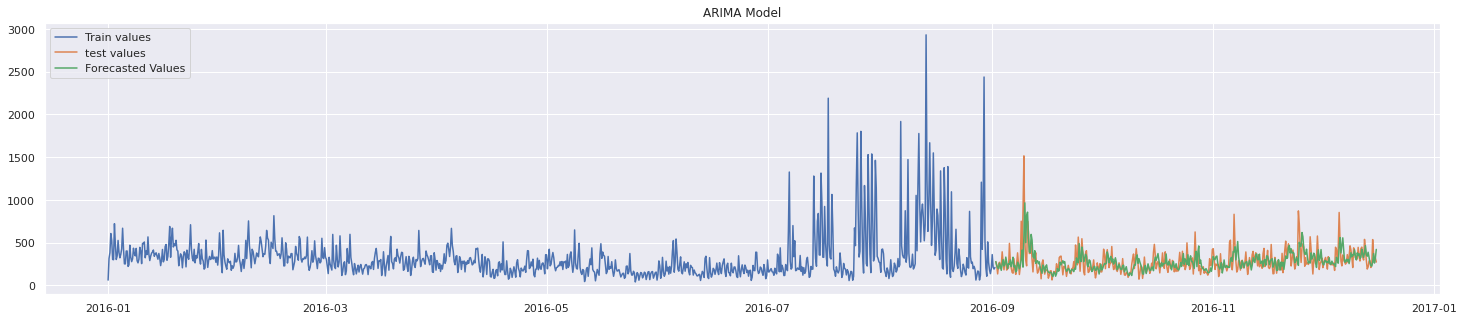

In [ ]:
test_set_range = test_df.index
train_set_range=train_df.index


plt.figure(figsize=(25,5))
plt.title("ARIMA Model")
plt.plot(train_set_range,train_df[:], label="Train values")
plt.plot(test_set_range,test_df[:], label="test values")
plt.plot(test_set_range,pred, "g", label="Forecasted Values")
plt.legend(loc="upper left")
plt.grid(True)

In [ ]:

rmse = mean_squared_error(test_df, pred, squared=False)
print('Root Mean Squared Error for ARIMA model : ' , rmse)

Root Mean Squared Error for ARIMA model :  125.53261558503677


## Observation

* ARIMA model able to predict the future values only with the 'House usage' , this implies when we have data for the past few days we will able to predict the future energy usages with this model without any device usage statistics like (Furnace, door usages).

* As per the above plots these models are getting the future predictions only with the past values and it doest depends any other values.

## DEEP NEURAL NETWORK -LSTM# 

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# convert an array of values into a dataset matrix

# Reference : https://github.com/dhamvi01/Univariate-Time-Series-using-LSTM

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return numpy.array(dataX), numpy.array(dataY)
 

from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


Epoch 1/50
978/978 [==============================] - 4s 3ms/step - loss: 154.7334 - val_loss: 94.4989
Epoch 2/50
978/978 [==============================] - 3s 3ms/step - loss: 134.8145 - val_loss: 85.1928
Epoch 3/50
978/978 [==============================] - 2s 2ms/step - loss: 132.1609 - val_loss: 84.5141
Epoch 4/50
978/978 [==============================] - 2s 2ms/step - loss: 131.0906 - val_loss: 84.1903
Epoch 5/50
978/978 [==============================] - 2s 2ms/step - loss: 133.1456 - val_loss: 111.8551
Epoch 6/50
978/978 [==============================] - 2s 2ms/step - loss: 131.6810 - val_loss: 86.4908
Epoch 7/50
978/978 [==============================] - 2s 2ms/step - loss: 131.0113 - val_loss: 117.5600
Epoch 8/50
978/978 [==============================] - 2s 3ms/step - loss: 131.0518 - val_loss: 95.2642
Epoch 9/50
978/978 [==============================] - 3s 3ms/step - loss: 130.7224 - val_loss: 84.6433
Epoch 10/50
978/978 [==============================] - 2s 2ms/step - lo

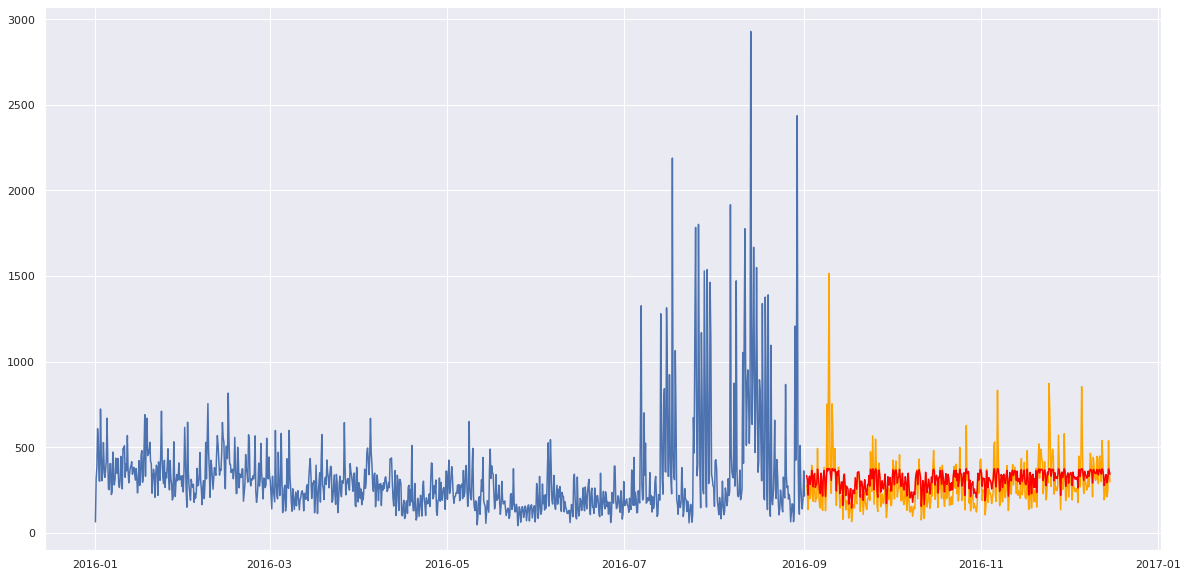

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_df.values, look_back)
testX, testY = create_dataset(test_df.values, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(1,1)))
model.add(Dense(20))
model.add(Dense(20))
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer='adam')
model.fit(trainX, trainY, epochs=50,validation_data=(testX,testY),batch_size=1, verbose=1)
# make predictions


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions


trainX=trainX.reshape(len(trainX))
trainX.shape
testX=testX.reshape(len(testX))
testPredict=testPredict.reshape(len(testPredict))
trainPredict=trainPredict.reshape(len(trainPredict))

train_set_range = train_df.index[:-2]
test_set_range = test_df.index[:-2]
train_set_range.shape



# plot
plt.figure(figsize=(20,10))
plt.plot(train_set_range,trainX)
plt.plot(test_set_range,testX,color='orange')
plt.plot(test_set_range,testPredict,color='red')
plt.show()

In [ ]:
X=data_df.drop('House overall',axis=1)
Y=data_df['House overall']

resampled_y = Y.resample('1 H').sum()
resampled_y.shape

n = len(resampled_y)
train_df = resampled_y[0:int(n*0.7)]
test_df = resampled_y[int(n*0.7):]

Epoch 1/10
5877/5877 [==============================] - 16s 2ms/step - loss: 20.0176 - val_loss: 15.3198
Epoch 2/10
5877/5877 [==============================] - 14s 2ms/step - loss: 19.3057 - val_loss: 14.3086
Epoch 3/10
5877/5877 [==============================] - 14s 2ms/step - loss: 19.0210 - val_loss: 13.8482
Epoch 4/10
5877/5877 [==============================] - 14s 2ms/step - loss: 18.8974 - val_loss: 14.0204
Epoch 5/10
5877/5877 [==============================] - 14s 2ms/step - loss: 18.7837 - val_loss: 13.8280
Epoch 6/10
5877/5877 [==============================] - 14s 2ms/step - loss: 18.8301 - val_loss: 13.8388
Epoch 7/10
5877/5877 [==============================] - 14s 2ms/step - loss: 19.0629 - val_loss: 13.6709
Epoch 8/10
5877/5877 [==============================] - 14s 2ms/step - loss: 18.8189 - val_loss: 14.0461
Epoch 9/10
5877/5877 [==============================] - 14s 2ms/step - loss: 18.8354 - val_loss: 14.9556
Epoch 10/10
5877/5877 [==============================] 

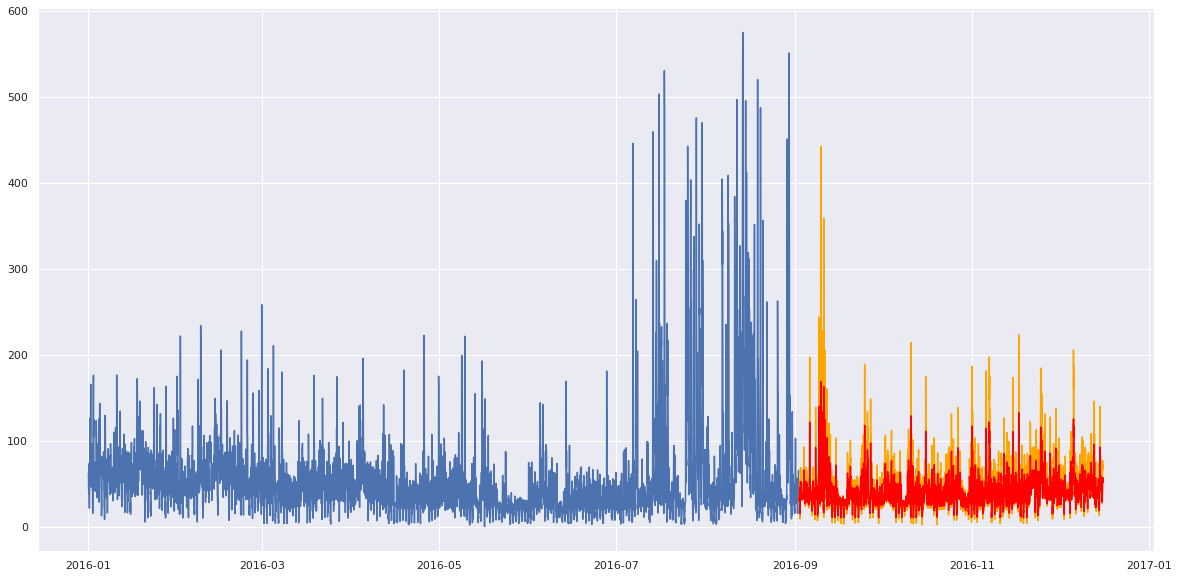

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_df.values, look_back)
testX, testY = create_dataset(test_df.values, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(1,1)))
model.add(Dense(20))
model.add(Dense(20))
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer='adam')
model.fit(trainX, trainY, epochs=10,validation_data=(testX,testY),batch_size=1, verbose=1)
# make predictions


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions


trainX=trainX.reshape(len(trainX))
trainX.shape
testX=testX.reshape(len(testX))
testPredict=testPredict.reshape(len(testPredict))
trainPredict=trainPredict.reshape(len(trainPredict))

train_set_range = train_df.index[:-2]
test_set_range = test_df.index[:-2]
train_set_range.shape



# plot
plt.figure(figsize=(20,10))
plt.plot(train_set_range,trainX)
plt.plot(test_set_range,testX,color='orange')
plt.plot(test_set_range,testPredict,color='red')
plt.show()

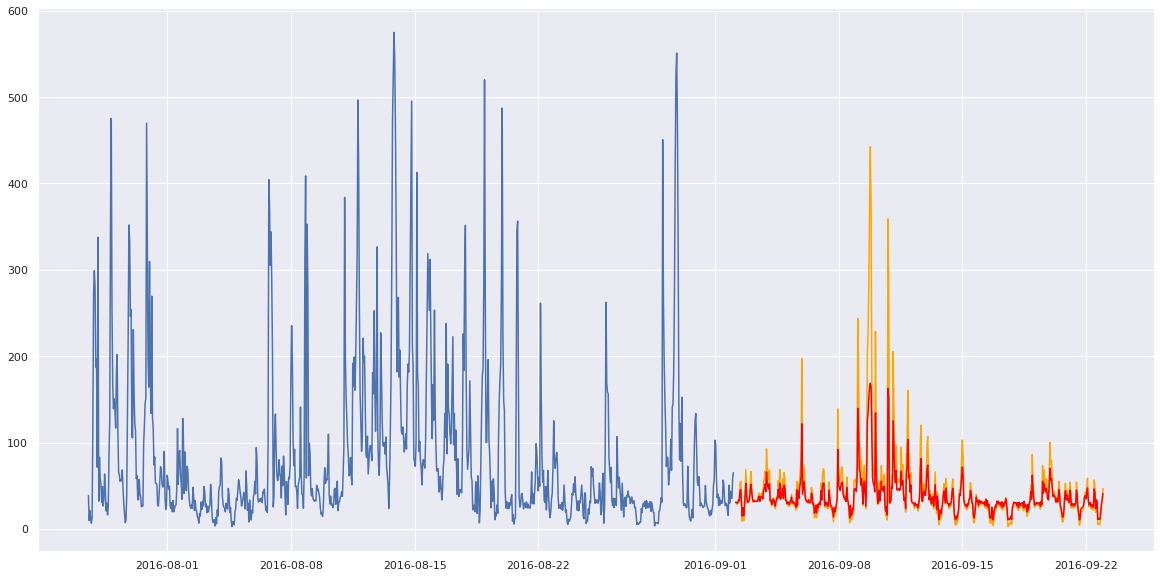

In [ ]:
# plot
plt.figure(figsize=(20,10))
plt.plot(train_set_range[5000:],trainX[5000:])
plt.plot(test_set_range[:500],testX[:500],color='orange')
plt.plot(test_set_range[:500],testPredict[:500],color='red')
plt.show()

## Summary

* LSTM model able to predict the trend of the data and the predicted value seen from the graph overlaps with the actual data , so this model performs well with our data
* RMSE error for the LSTM model is only 13.73  for the test data (Best value), eventhough there are few points where the predicted and actual value differes much as shown in the above graph.
* From these  We can see that our LSTM model performs better than other simple models and ARIMA statds next to it.

## Multivariate analysis

## XGboost model to find Feature importance

[09:45:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


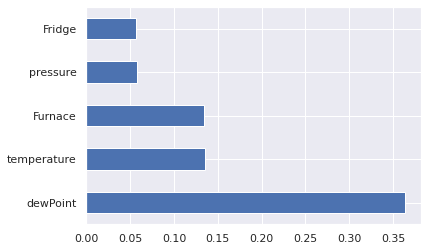

In [ ]:
import xgboost
from xgboost import XGBRegressor
from matplotlib import pyplot


X=data_df.drop('House overall',axis=1)
Y=data_df['House overall']

train_X = X.resample('3 H').sum()
 
train_Y = Y.resample('3 H').sum()

# define the model
model = XGBRegressor()

# fit the model
model.fit(train_X, train_Y)
# get importance
importance = model.feature_importances_
# plot feature importance
## Reference : https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Observation

* We will take the top most 5 important features as analyzed from the above plot for consideration and build models with these features.

## VAR Model (Vector Auto Regressions)


VAR method models the next step in each time series using an AR model. The notation for the model involves specifying the order for the AR(p) model as parameters to a VAR function {VAR(p)}.

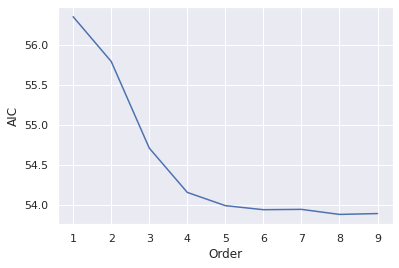

In [ ]:
X=data_df[['dewPoint','Fridge','temperature','Wine cellar','Furnace','House overall']]

resampled_data = X.resample('6 H').sum()

nobs = 120
train_X, test_X = resampled_data[0:-nobs], resampled_data[-nobs:]
cols=data_df.columns

forecasting_model = VAR(train_X)
results_aic = []
for p in range(1,10):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

import seaborn as sns
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

                     dewPoint     Fridge  ...     Furnace  House overall
2016-01-01 06:00:00   7277.70  18.201150  ...  162.705667     252.407150
2016-01-01 12:00:00    237.68   3.714700  ...  -51.541300      66.608500
2016-01-01 18:00:00   -311.20  23.620783  ...   12.620483     225.239933
2016-01-02 00:00:00  -1622.80 -26.105267  ...  -13.653767     -82.047300
2016-01-02 06:00:00   -526.54  -2.918817  ...   41.811867    -221.036833

[5 rows x 6 columns]


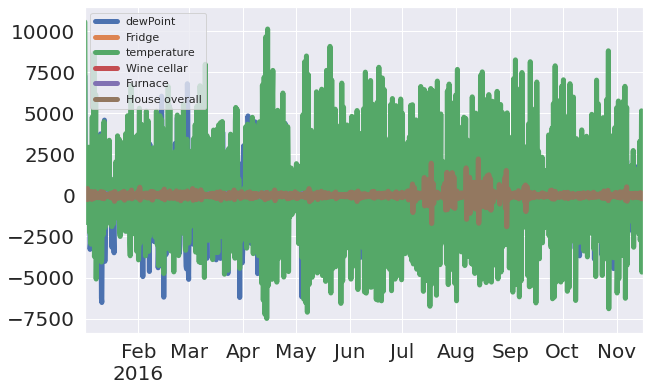

In [ ]:
df_tr_diff = train_X.diff()
df_tr_diff.dropna(inplace=True)
print(df_tr_diff.head())
df_tr_diff.plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.show()


* Here we can see how the normalized values are being plotted in the time series. The relationship between dewpoint, temperature, and others shows as relationshipstrong as they follow the same line pattern, which clearly says the change in temperature will affect others or vice-versa.
* But the House overall is not follows any indivudual features its following the overall treand and lies at 0 interval.

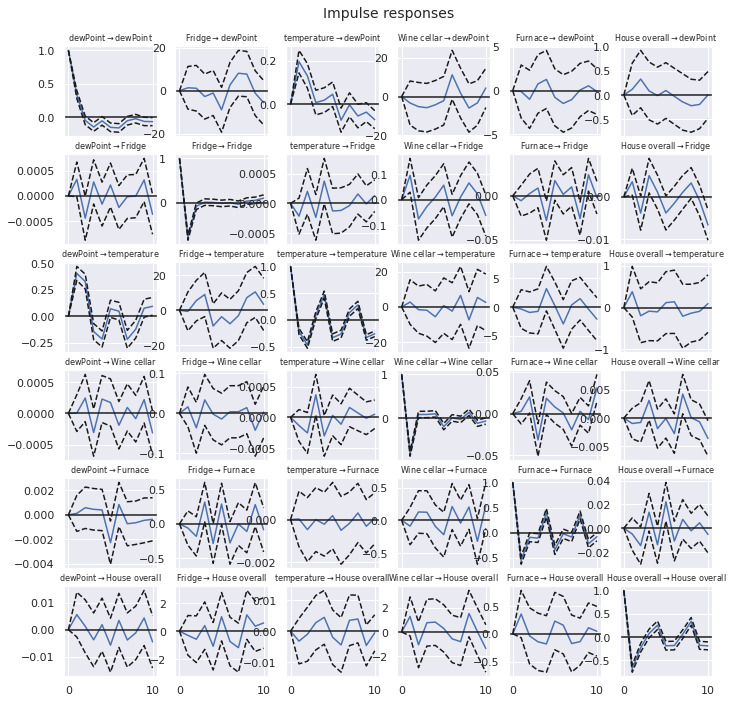

In [ ]:
#Fit VAR model
var_model = VAR(endog=df_tr_diff)
var_model_fit = var_model.fit(maxlags=10)

# Impulse Response Analysis
irf = var_model_fit.irf(10)
irf.plot(plot_params=None,subplot_params={'fontsize' : 8})
plt.show()


* The above impulse reponse shows how each feature affects the other features as we see the Temperature and dewpoint follows the same trend as Furnace and wind celler.

In [ ]:
# Get the lag order
lag_order = var_model_fit.k_ar

# Input data for forecasting
input_data = df_tr_diff.values[-lag_order:]

# forecasting
pred = var_model_fit.forecast(y=input_data, steps=nobs)
pred = (pd.DataFrame(pred, index=test_X.index, columns= df_tr_diff.columns + '_pred'))

def invert_transformation(df_tr_diff, pred):
  forecast = pred.copy()
  columns = train_X.columns

  for col in columns:
    forecast[str(col)+'_pred'] = train_X[col].iloc[-1] +  forecast[str(col)+'_pred'].cumsum()
  return forecast
output = invert_transformation(df_tr_diff, pred)

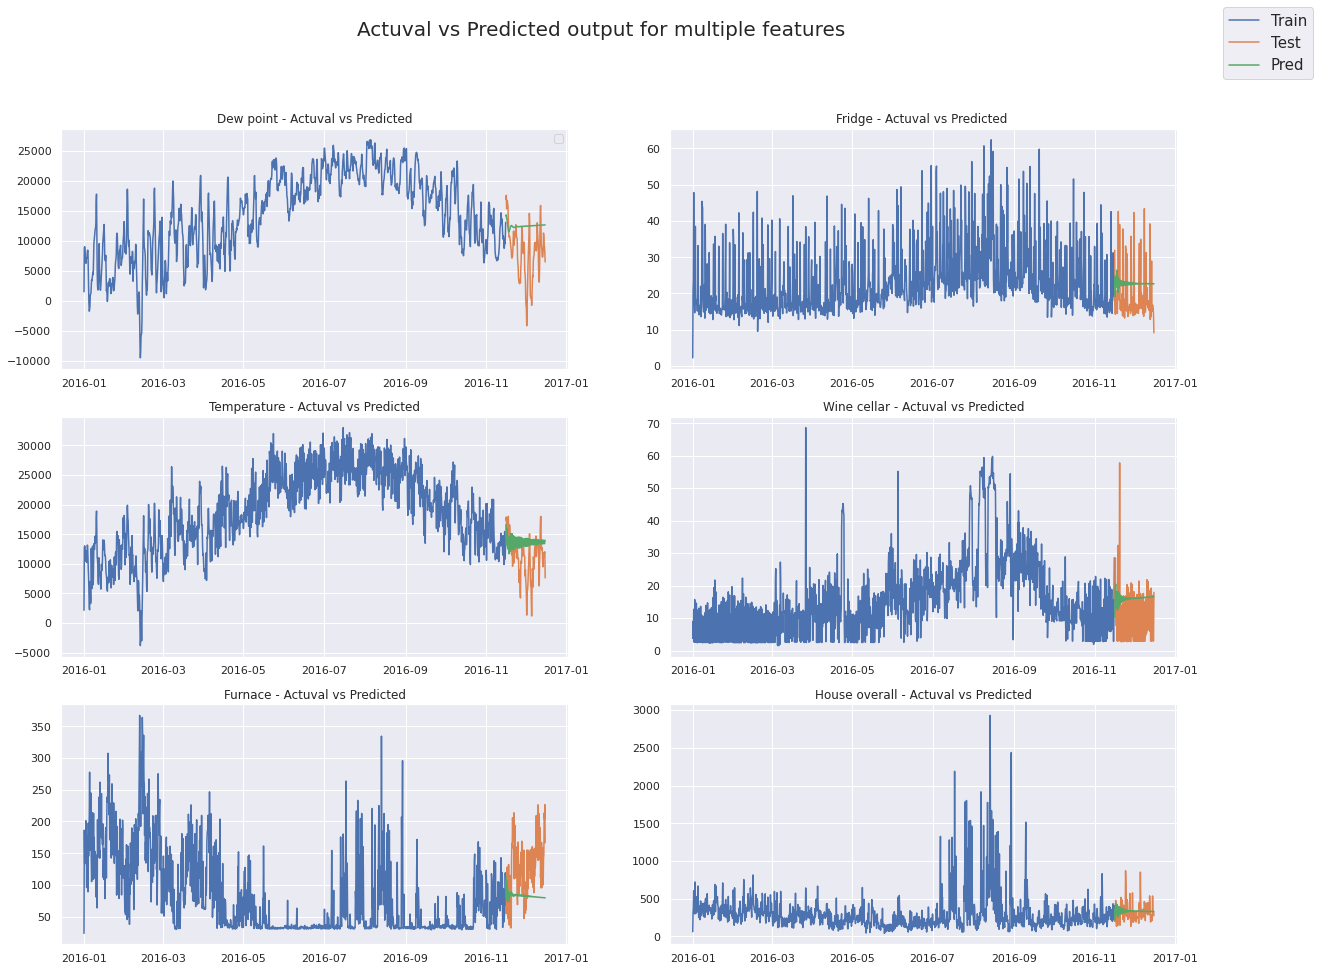

In [ ]:
fig, axs = plt.subplots(3, 2,figsize = (20,15))

axs[0, 0].set_title("Dew point - Actuval vs Predicted")
axs[0, 0].plot(train_X.index,train_X['dewPoint'])
axs[0, 0].plot(test_X['dewPoint'].index,test_X['dewPoint'][:120])
axs[0, 0].plot(test_X['dewPoint'].index,output['dewPoint_pred'])
axs[0, 0].legend()

axs[0, 1].set_title('Fridge - Actuval vs Predicted ')
axs[0, 1].plot(train_X.index,train_X['Fridge'])
axs[0, 1].plot(test_X['Fridge'].index,test_X['Fridge'][:120])
axs[0, 1].plot(test_X['Fridge'].index,output['Fridge_pred'])

axs[1, 0].set_title("Temperature - Actuval vs Predicted")
axs[1, 0].plot(train_X.index,train_X['temperature'])
axs[1, 0].plot(test_X['temperature'].index,test_X['temperature'][:120])
axs[1, 0].plot(test_X['temperature'].index,output['temperature_pred'])

axs[1, 1].set_title("Wine cellar - Actuval vs Predicted")
axs[1, 1].plot(train_X.index,train_X['Wine cellar'])
axs[1, 1].plot(test_X['Wine cellar'].index,test_X['Wine cellar'][:120])
axs[1, 1].plot(test_X['Wine cellar'].index,output['Wine cellar_pred'])

axs[2, 0].set_title("Furnace - Actuval vs Predicted")
axs[2, 0].plot(train_X.index,train_X['Furnace'])
axs[2, 0].plot(test_X['Furnace'].index,test_X['Furnace'][:120])
axs[2, 0].plot(test_X['Furnace'].index,output['Furnace_pred'])

axs[2, 1].set_title("House overall - Actuval vs Predicted")
axs[2, 1].plot(train_X.index,train_X['House overall'])
axs[2, 1].plot(test_X['House overall'].index,test_X['House overall'][:120])
axs[2, 1].plot(test_X['House overall'].index,output['House overall_pred'])

fig.suptitle('Actuval vs Predicted output for multiple features', fontsize=20)
fig.legend(labels=['Train','Test','Pred'],
           loc="upper right",fontsize=15)                    


In [ ]:
rmse = mean_squared_error(test_X['House overall'], output['House overall_pred'], squared=False)
print('Root Mean Squared Error for VAR  model : ' , rmse)

Root Mean Squared Error for VAR  model :  124.79092928787489


### Summary 
* This VAr model predicts the future values for each feature and as seen in the plot we can observe it is able to predict the trend but only follows some mean values.

## FB Prophet Nodel

In [ ]:
from fbprophet import Prophet

X=data_df.drop('House overall',axis=1)
Y=data_df['House overall']

resampled_y = Y.resample('1 H').sum()
resampled_y.shape

df=pd.DataFrame()
df['ds']=resampled_y.index
df['y']=resampled_y.values


n = len(resampled_y)
train_df = df[0:int(n*0.7)]
test_df = df[int(n*0.7):]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


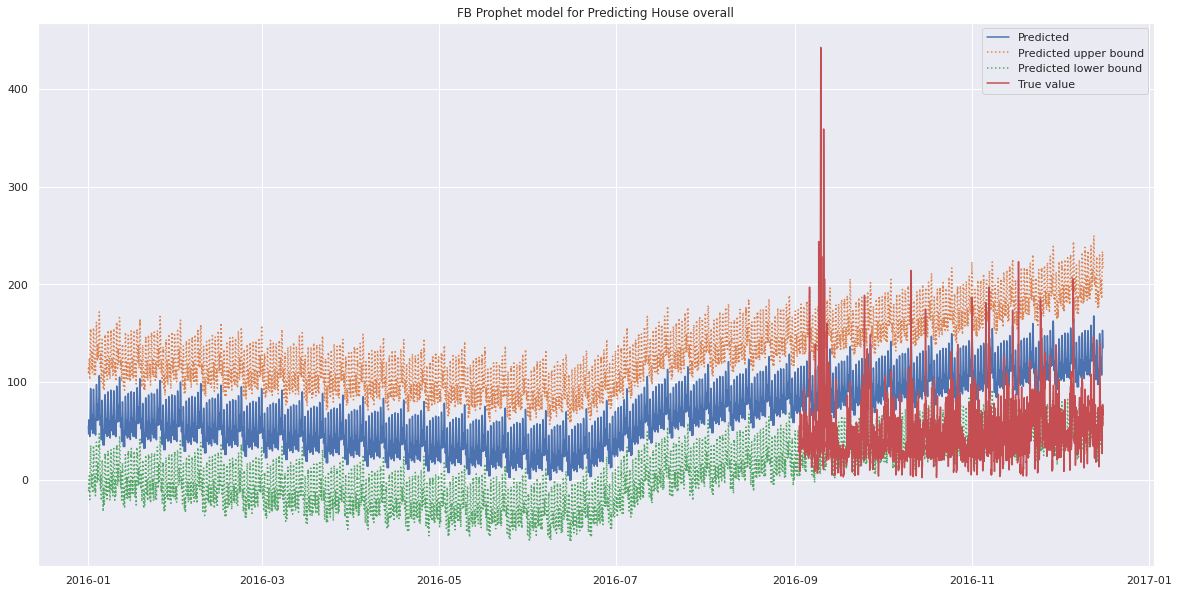

In [ ]:
# Model Building
model=Prophet()
model.fit(train_df)

forecast=model.make_future_dataframe(periods=len(test_df),freq = '1 H', include_history = True)

pred=model.predict(forecast)
pred=pred[['ds','yhat','yhat_lower','yhat_upper']]

# plot
plt.figure(figsize=(20,10))
plt.title("FB Prophet model for Predicting House overall")
plt.plot(pred.ds,pred['yhat'])
plt.plot(pred.ds,pred['yhat_upper'],ls='dotted')
plt.plot(pred.ds,pred['yhat_lower'],ls='dotted')
plt.plot(test_df.ds,test_df['y'])
plt.legend(['Predicted','Predicted upper bound','Predicted lower bound','True value'])

plt.show()


In [ ]:
rmse = mean_squared_error(test_df['y'], pred['yhat'][-len(test_df):], squared=False)
print('Root Mean Squared Error for PROphet  model : ' , rmse)

Root Mean Squared Error for PROphet  model :  69.36670203658441


### Obsevation
* In this model we are able to predict the upper bound trend and lower bound trend and as we see the predict values is lies in the interval of the original values bounding lines.

## Light BGM

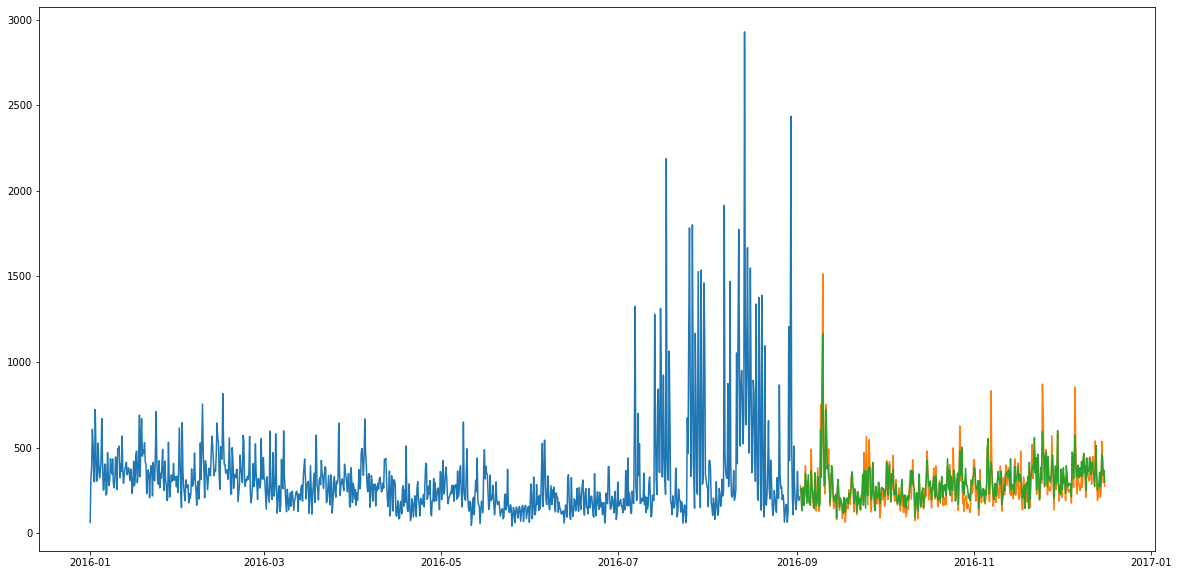

Root Mean Squared Error for LightGBM model :  68.92023565750942


In [8]:
from lightgbm import LGBMRegressor

X=data_df.drop('House overall',axis=1)
Y=data_df['House overall']

# Spliting the data into 6H interval for data modeling
resampled_X = X.resample('6 H').sum()
resampled_Y = Y.resample('6 H').sum()

n = len(resampled_Y)
train_X = resampled_X[0:int(n*0.7)]
train_Y = resampled_Y[0:int(n*0.7)]
test_X = resampled_X[int(n*0.7):]
test_Y= resampled_Y[int(n*0.7):]

# Model 
model = LGBMRegressor()
model.fit(train_X, train_Y)

# Prediction
yhat = model.predict(test_X)

# plot
plt.figure(figsize=(20,10))
plt.plot(train_Y.index,train_Y)
plt.plot(test_Y.index,test_Y)
plt.plot(test_Y.index,yhat)
plt.show()

# Rmse 
rmse = mean_squared_error(yhat, test_Y, squared=False)
print('Root Mean Squared Error for LightGBM model : ' , rmse)

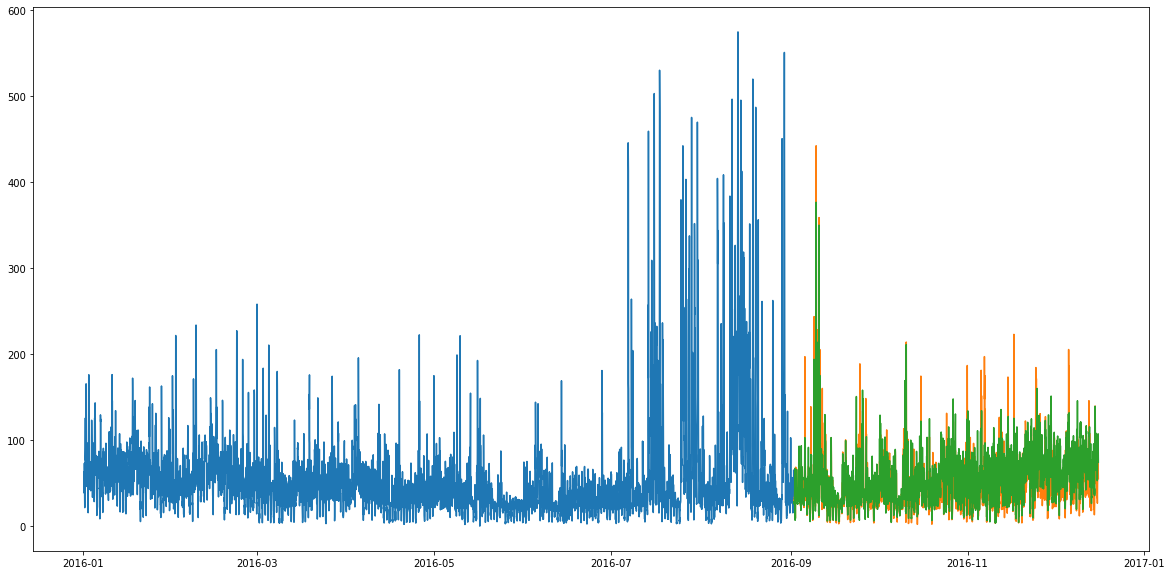

Root Mean Squared Error for LightGBM model :  19.237361706543734


In [11]:
from lightgbm import LGBMRegressor
import pickle
X=data_df.drop('House overall',axis=1)
Y=data_df['House overall']

# Spliting the data into 1H interval for data modeling
resampled_X = X.resample('1 H').sum()
resampled_Y = Y.resample('1 H').sum()

n = len(resampled_Y)
train_X = resampled_X[0:int(n*0.7)]
train_Y = resampled_Y[0:int(n*0.7)]
test_X = resampled_X[int(n*0.7):]
test_Y= resampled_Y[int(n*0.7):]

# Model 
model = LGBMRegressor()
model.fit(train_X, train_Y)

# Prediction
yhat = model.predict(test_X)

# plot
plt.figure(figsize=(20,10))
plt.plot(train_Y.index,train_Y)
plt.plot(test_Y.index,test_Y)
plt.plot(test_Y.index,yhat)
plt.show()

# Rmse 
rmse = mean_squared_error(yhat, test_Y, squared=False)
print('Root Mean Squared Error for LightGBM model : ' , rmse)

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
model.score()

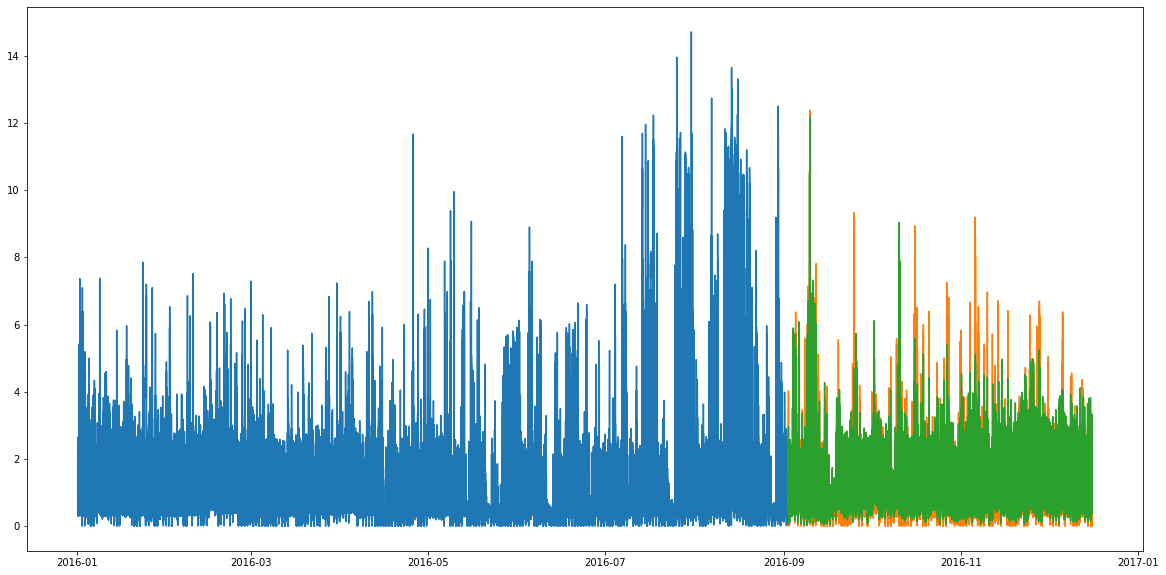

Root Mean Squared Error for LightGBM model :  0.43807441963851845


In [9]:
from lightgbm import LGBMRegressor

X=data_df.drop('House overall',axis=1)
Y=data_df['House overall']

# Spliting the data into 1M interval for data modeling
resampled_X = X.resample('60 s').sum()
resampled_Y = Y.resample('60 s').sum()

n = len(resampled_Y)
train_X = resampled_X[0:int(n*0.7)]
train_Y = resampled_Y[0:int(n*0.7)]
test_X = resampled_X[int(n*0.7):]
test_Y= resampled_Y[int(n*0.7):]

# Model 
model = LGBMRegressor()
model.fit(train_X, train_Y)

# Prediction
yhat = model.predict(test_X)

# plot
plt.figure(figsize=(20,10))
plt.plot(train_Y.index,train_Y)
plt.plot(test_Y.index,test_Y)
plt.plot(test_Y.index,yhat)
plt.show()

# Rmse 
rmse = mean_squared_error(yhat, test_Y, squared=False)
print('Root Mean Squared Error for LightGBM model : ' , rmse)

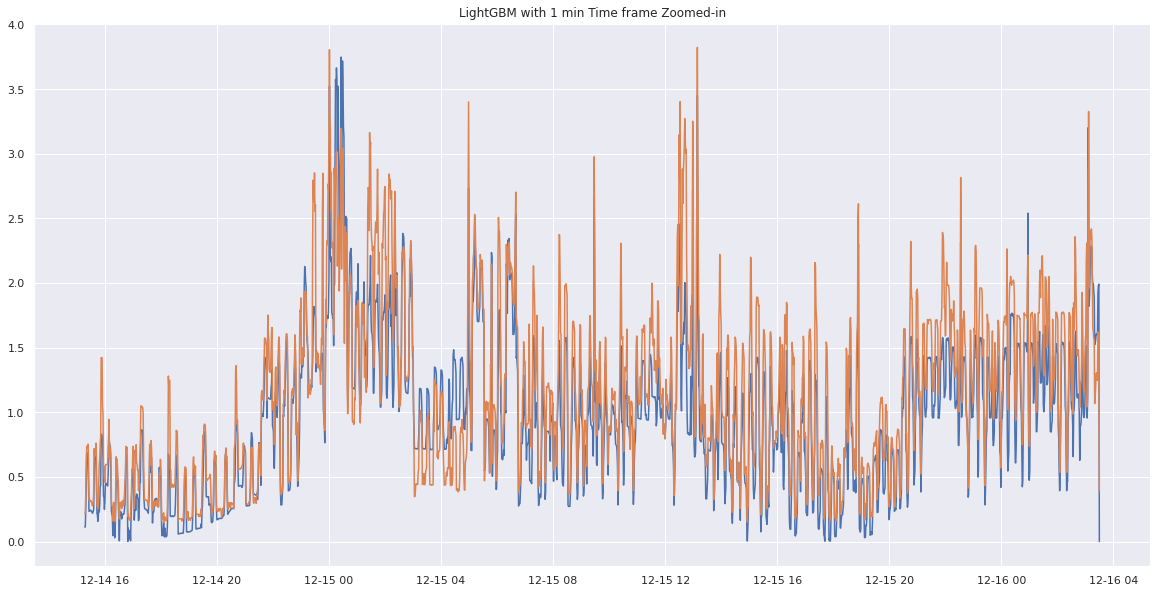

In [ ]:
# plot
plt.figure(figsize=(20,10))
#plt.plot(train_Y.index,train_Y)
plt.plot(test_Y.index[149000:],test_Y[149000:])
plt.plot(test_Y.index[149000:],yhat[149000:])
plt.title('LightGBM with 1 min Time frame Zoomed-in')
plt.show()

### Observation

* The Light GBM model outperforms all other models and it has only 0.43 RMSE error.
*From the above plot we can clerly see that even the short term trend is able to capture by the lightGbm model and it Predicts the Test data well with 1 Min time frame.

In [4]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Data with Time Frame", "Model", "Window Size","RMSE"]
x.add_row(["Data with 6 H Time frame", "SMA", "3", 786.95] )
x.add_row(["Data with 6 H Time frame", "SMA", "6", 1877.9] )
x.add_row(["Data with 6 H Time frame", "WMA", "3", 137.6] )
x.add_row(["Data with 6 H Time frame", "WMA", "6", 171.7] )
x.add_row(["Data with 6 H Time frame", "WMA", "12", 200.1] )
x.add_row(["Data with 6 H Time frame", "EMA", "3", 124.4] )
x.add_row(["Data with 6 H Time frame", "EMA", "6", 169.3] )
x.add_row(["Data with 6 H Time frame", "EMA", "12", 198.5] )
x.add_row(["Data with 6 H Time frame", "ARIMA", "-", 125.5] )
x.add_row(["Data with 6 H Time frame", "LSTM", "-", 84.0] )
x.add_row(["Data with 1 H Time frame", "LSTM", "-", 13.78] )
x.add_row(["Data with 6 H Time frame", "VAR - Multivariate ", "-", 124.3] )
x.add_row(["Data with 1 H Time frame", "FB Prophet Univariate ", "-", 69.3] )
x.add_row(["Data with 6 H Time frame", "LIGHT-GBM -Multivariate ", "-", 68.2] )
x.add_row(["Data with 1 H Time frame", "LIGHT-GBM -Multivariate ", "-", 19.23] )
x.add_row(["Data with 1 Min Time frame", "LIGHT-GBM -Multivariate ", "-", 0.43] )
print("Results")
print(x)

Results
+----------------------------+--------------------------+-------------+--------+
|    Data with Time Frame    |          Model           | Window Size |  RMSE  |
+----------------------------+--------------------------+-------------+--------+
|  Data with 6 H Time frame  |           SMA            |      3      | 786.95 |
|  Data with 6 H Time frame  |           SMA            |      6      | 1877.9 |
|  Data with 6 H Time frame  |           WMA            |      3      | 137.6  |
|  Data with 6 H Time frame  |           WMA            |      6      | 171.7  |
|  Data with 6 H Time frame  |           WMA            |      12     | 200.1  |
|  Data with 6 H Time frame  |           EMA            |      3      | 124.4  |
|  Data with 6 H Time frame  |           EMA            |      6      | 169.3  |
|  Data with 6 H Time frame  |           EMA            |      12     | 198.5  |
|  Data with 6 H Time frame  |          ARIMA           |      -      | 125.5  |
|  Data with 6 H Tim

## Summary

* From the all above models we can see out Ligt-GBM outperforms well with our data and its RMSE is also very less compared to other in Multivariate analysis.

* LSTM still performs best in Univariate model bulding so as per the requirement we can use any of these two models to predict the future values.

### Why RMSE: 

* In this problem we used RMSE as a error metric this metric is likewise always positive, with lower values indicating higher performance. The RMSE number is in the same unit as the projected value, which is an advantage of this technique.<br><br>
* As we used both single feature prediction model and multiple feature prediction so to generalize that, we need to come with the single metric so we can compare the model performances.<br><br>
* While in Multi feature modeling we wave some features like <b> Temperature, Dewpoint , Furnace </b> as these values are lie in different scale if we use any Metrics like MAPE as these values lies in zero scale in some times makes no sense for calculating percentages in that case.<br><br>


##  Future usage of these models :

* Once We have a past data for the energy usage values in a particular region we can easily predict how much energy will be used in the future so we can plan accordingly and avoid power outages in that place.<br><br>
* These models are not any region specifc so we can train these models with the particular region data without modifying the model , so that these models will able to give resonable predictions in all types of conditions.<br><br>
* As we see eventhough our model performs better with the 1 min timeframe with the least RMSE error , in practical predicting with the short-time frame will not give much importance for the next day predictions and so on.<br><br>
* With this data set 6H and 1H time frame performs reasonably well but if we need some accurate predictions, predicting with <b>1H time frame gives better predictability</b>.<br><br>
* We build the model using single and multiple features , from the results we can see <b>LSTM with single feature and Ligh-GBM with multiple features</b> gives us similar RMSE so both model can be used to predict the future values. If we use multiple features then from the XGBOOST model we can observe <b>Dewpoint , Fridge , Temperature, Furnace, Pressure </b> these featurea gives us more feature importance values so we can use these top 5 features to predict the future values and  <b> Dewpoint </b>plays a major role in it.<br><br>
* From this results using <b> Single feature </b> will be easy to maintain and retrain our model regularly and cost for the data collection is also very low.<br><br>

In [ ]:
* 